In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
htr = pd.read_csv('train.csv')
hte = pd.read_csv('test.csv')

# Drop the Id column
htr = htr.drop('Id', axis = 1)

In [3]:
htr.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
htr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [5]:
htr.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


C:\Users\Roy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


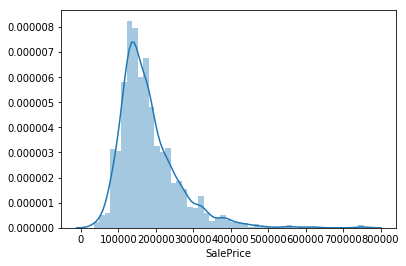

In [6]:
sns.distplot(htr['SalePrice'])

In [7]:
# Calculate Standard Deviation
np.std(htr['SalePrice'])

79415.29188606751

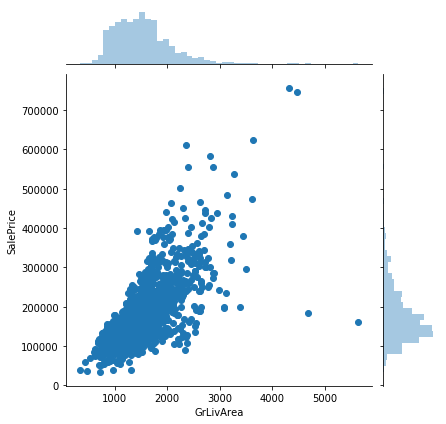

In [8]:
# Relationship between a continuous variable and SalePrice
sns.jointplot(x = 'GrLivArea', y = 'SalePrice', data = htr, kind = 'scatter')

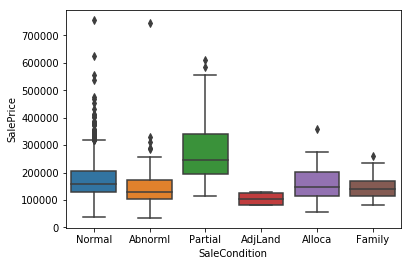

In [9]:
# Relationship between a categorical variable and SalePrice
sns.boxplot(x = 'SaleCondition',y = 'SalePrice', data = htr)

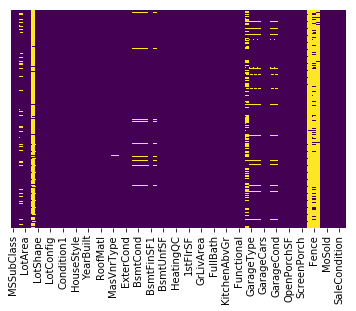

In [10]:
sns.heatmap(htr.isnull(),yticklabels=False,cbar=False,cmap='viridis')

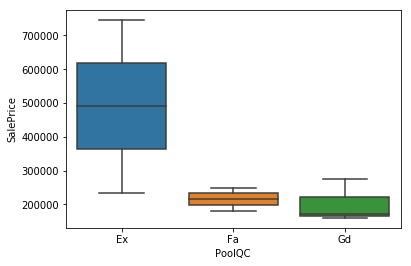

In [11]:
# Test Comparisons with Categorical Variables to SalePrice here
sns.boxplot(x = 'PoolQC',y = 'SalePrice', data = htr)

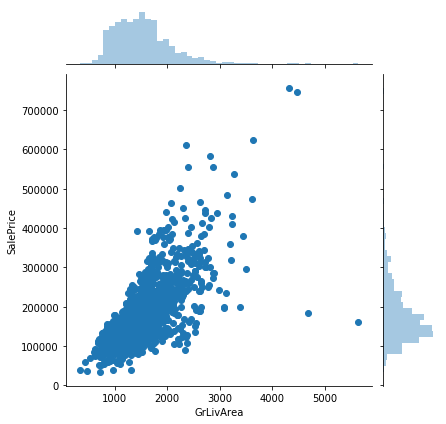

In [12]:
# Test Comparisons with Continuous Variables to SalePrice here
sns.jointplot(x = 'GrLivArea', y = 'SalePrice', data = htr)

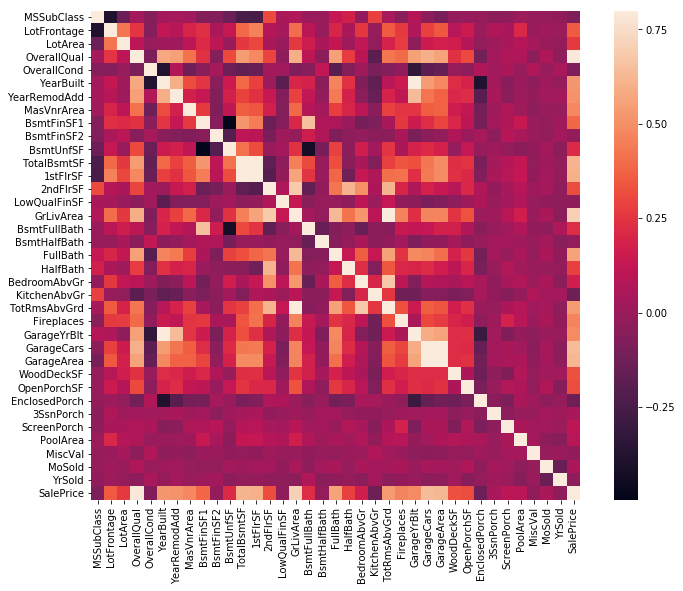

In [13]:
# Use heatmap to visualize correlation matrix
corrmat = htr.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

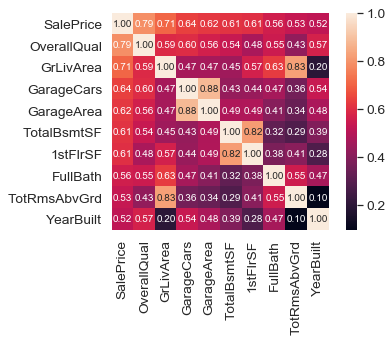

In [14]:
# Shortened correlation matrix for this data set. 10 x 10 matrix with percentages.
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(htr[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [15]:
# Total all the missing data and percentage and sort it.
total = htr.isnull().sum().sort_values(ascending=False)
percent = (htr.isnull().sum()/htr.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageCond,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


In [16]:
# Fill in missing data with appropriate values. Data Description that came with the data includes 'NA' for 'None'
# Pandas interpreted these 'NA' values to be null. Fill them in with 'None'
htr['PoolQC'] = htr['PoolQC'].fillna('None')
htr['MiscFeature'] = htr['MiscFeature'].fillna('None')
htr['Alley'] = htr['Alley'].fillna('None')
htr['Fence'] = htr['Fence'].fillna('None')
htr['FireplaceQu'] = htr['FireplaceQu'].fillna('None')
htr['GarageType'] = htr['GarageType'].fillna('None')
htr['GarageCond'] = htr['GarageCond'].fillna('None')
htr['GarageFinish'] = htr['GarageQual'].fillna('None')
htr['GarageQual'] = htr['GarageQual'].fillna('None')
htr['BsmtFinType2'] = htr['BsmtFinType2'].fillna('None')
htr['BsmtExposure'] = htr['BsmtExposure'].fillna('None')
htr['BsmtQual'] = htr['BsmtQual'].fillna('None')
htr['BsmtCond'] = htr['BsmtCond'].fillna('None')
htr['BsmtFinType1'] = htr['BsmtFinType1'].fillna('None')
htr['MasVnrType'] = htr['BsmtQual'].fillna('None')
# Fill the numerical value with 0
htr['GarageYrBlt'] = htr['GarageCond'].fillna(0)
htr['MasVnrArea'] = htr['MasVnrArea'].fillna(0)
# Assume that one missing Electrical value uses the standard circuit breaker
htr['Electrical'] = htr['Electrical'].fillna('SBrkr')

In [17]:
# Total up missing data again
total = htr.isnull().sum().sort_values(ascending=False)
percent = (htr.isnull().sum()/htr.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(3)

,Total,Percent
LotFrontage,259,0.177397
SalePrice,0,0.000000
BsmtQual,0,0.000000


In [18]:
# LotFrontage appears to actually have some missing values. Not sure if we can just fill in 0 for this one.
# LotFrontage describes "Linear feet of street connected to property"
# Assume that houses in the same neighborhood have similar LotFrontages. Take median LotFrontage of houses in respective
# neighborhood. Fill in missing values with those.
htr["LotFrontage"] = htr.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [19]:
# No more missing data
total = htr.isnull().sum().sort_values(ascending=False)
percent = (htr.isnull().sum()/htr.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(3)

,Total,Percent
SalePrice,0,0.0
SaleCondition,0,0.0
RoofMatl,0,0.0


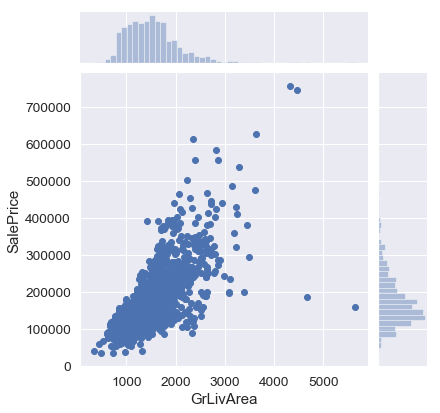

In [20]:
# Outlier analysis
sns.jointplot(x = 'GrLivArea', y = 'SalePrice', data = htr, kind = 'scatter')

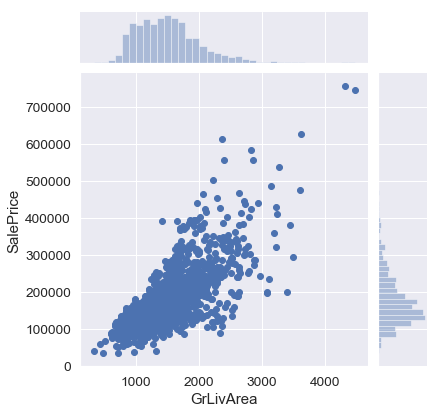

In [21]:
# Delete some outliers
# Plot again
htr = htr.drop(htr[(htr['GrLivArea']>4000) & (htr['SalePrice']<300000)].index)
sns.jointplot(x = 'GrLivArea', y = 'SalePrice', data = htr, kind = 'scatter')

In [22]:
# Feature Reduction
# Refer to correlation matrix heatmap for some features to drop.
htr.drop(['GarageYrBlt','GarageArea','1stFlrSF','TotRmsAbvGrd'],axis = 1, inplace = True)

In [23]:
# Encode Variables
# Use Label Encoding for features that denote order. Dummy encoding for the rest of them.
from sklearn.preprocessing import LabelEncoder
# Tuple of columns that we want to label encode.
cols = ('ExterQual', 'ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual',
       'FireplaceQu','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence')

In [24]:
for c in cols:
    encoder = LabelEncoder()
    encoder.fit(list(htr[c].values))
    htr[c] = encoder.transform(list(htr[c].values))

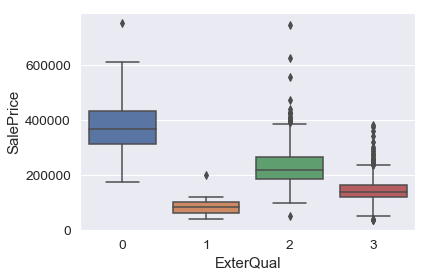

In [25]:
# Boxplot of a new categorical variable
sns.boxplot(x = 'ExterQual',y = 'SalePrice', data = htr)

In [26]:
# Encode everything else with pandas dummy encoding
htr = pd.get_dummies(htr)

In [27]:
# Tuple containing the median and standard deviation of SalePrice
info_tup = (80000, htr['SalePrice'].max())
# Get the classes given the (rounded) std and max
def get_classes(info_tup):
    pass
    classes = [info_tup[0]]
    index = 0
    while classes[index] + info_tup[0]< info_tup[1]:
        classes.append(classes[index] + info_tup[0])
        index += 1
    return classes

In [28]:
# Function to apply to the SalePrice column
def impute_class(cols):
    sale_price = cols[0]
    if sale_price <= 80000:
        return '0 - 80000'
    elif sale_price <= 160000:
        return '80000 - 160000'
    elif sale_price <= 240000:
        return '160000 - 240000'
    elif sale_price <= 320000:
        return '240000 - 320000'
    elif sale_price <= 400000:
        return '320000 - 400000'
    elif sale_price <= 480000:
        return '400000 - 480000'
    elif sale_price <= 560000:
        return '480000 - 560000'
    elif sale_price <= 640000:
        return '560000 - 640000'
    elif sale_price <= 720000:
        return '640000 - 720000'
    else:
        return '> 720000'

In [29]:
# Apply function to transform SalePrice
htr['SalePrice'] = htr[['SalePrice']].apply(impute_class,axis=1)

In [30]:
# Import train test split
from sklearn.model_selection import train_test_split

In [31]:
# X = Features
# y = Labels
X = htr.drop('SalePrice',axis = 1)
y = htr['SalePrice']

In [32]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [33]:
# Use sklearn's StandardScaler to scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [34]:
# Scale our features
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\Roy\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Roy\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Roy\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
# Import the models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [36]:
# Initialize models
log_model = LogisticRegression()
knn_model = KNeighborsClassifier(n_neighbors = 10)
dtree_model = DecisionTreeClassifier()
rforest_model = RandomForestClassifier(n_estimators = 100)
svm_model = SVC()
nb_model = GaussianNB()

In [37]:
# Fit all of them onto the training data
log_model.fit(X_train,y_train)
knn_model.fit(X_train,y_train)
dtree_model.fit(X_train,y_train)
rforest_model.fit(X_train,y_train)
svm_model.fit(X_train,y_train)
nb_model.fit(X_train,y_train)

C:\Users\Roy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Roy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Roy\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


GaussianNB(priors=None, var_smoothing=1e-09)

In [38]:
# Predict on test data
log_predictions = log_model.predict(X_test)
knn_predictions = knn_model.predict(X_test)
dtree_predictions = dtree_model.predict(X_test)
rforest_predictions = rforest_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)
nb_predictions = nb_model.predict(X_test)

In [39]:
# Evaluate all the predictions with the sklearn.metrics package.
from sklearn.metrics import classification_report,confusion_matrix

In [40]:
# Print the confusion matrices for all of our predictions. There's a lot of classes here so our confusion matrix is pretty big
# and hard to interpret.
print('Logistic Regression Confusion Matrix')
print(confusion_matrix(y_test,log_predictions))
print('KNN Confusion Matrix')
print(confusion_matrix(y_test,knn_predictions))
print('Decision Tree Confusion Matrix')
print(confusion_matrix(y_test,dtree_predictions))
print('Random Frest Confusion Matrix')
print(confusion_matrix(y_test,rforest_predictions))
print('SVM Confusion Matrix')
print(confusion_matrix(y_test,svm_predictions))
print('Gaussian Naive Bayes Confusion Matrix')
print(confusion_matrix(y_test,nb_predictions))

Logistic Regression Confusion Matrix
[[  4   0   0   0   0   0   8   0]
 [  0 109   7   0   0   0  18   0]
 [  0  31  17   5   1   0   4   0]
 [  0   3   9   2   0   0   0   0]
 [  0   0   3   1   0   1   0   0]
 [  0   0   0   0   0   0   0   0]
 [  9  22   1   0   0   0 182   0]
 [  0   0   1   0   0   0   0   0]]
KNN Confusion Matrix
[[  0   0   0   0   0  12   0]
 [  0 111   1   0   0  22   0]
 [  0  36  15   0   1   6   0]
 [  0   3  10   1   0   0   0]
 [  0   0   2   2   1   0   0]
 [  0  15   0   0   0 199   0]
 [  0   1   0   0   0   0   0]]
Decision Tree Confusion Matrix
[[  7   0   0   0   0   0   0   5   0]
 [  0 109  14   1   0   0   0  10   0]
 [  0  22  26   8   2   0   0   0   0]
 [  0   2   3   7   1   0   0   1   0]
 [  0   0   0   2   2   1   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [ 12  29   2   0   0   0   0 171   0]
 [  0   0   0   0   0   0   1   0   0]]
Random Frest Confusion Matrix
[[  1   0   0   0   0   0  11 

In [41]:
# Classification reports
print('Logistic Regression Classification Report')
print(classification_report(y_test,log_predictions))

Logistic Regression Classification Report
                 precision    recall  f1-score   support

      0 - 80000       0.31      0.33      0.32        12
160000 - 240000       0.66      0.81      0.73       134
240000 - 320000       0.45      0.29      0.35        58
320000 - 400000       0.25      0.14      0.18        14
400000 - 480000       0.00      0.00      0.00         5
480000 - 560000       0.00      0.00      0.00         0
 80000 - 160000       0.86      0.85      0.85       214
       > 720000       0.00      0.00      0.00         1

      micro avg       0.72      0.72      0.72       438
      macro avg       0.32      0.30      0.30       438
   weighted avg       0.70      0.72      0.70       438



C:\Users\Roy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Roy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Roy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Roy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Roy\Anaconda3\lib\site-packages

In [42]:
print('KNN Classification Report')
print(classification_report(y_test,knn_predictions))

KNN Classification Report
                 precision    recall  f1-score   support

      0 - 80000       0.00      0.00      0.00        12
160000 - 240000       0.67      0.83      0.74       134
240000 - 320000       0.54      0.26      0.35        58
320000 - 400000       0.33      0.07      0.12        14
400000 - 480000       0.50      0.20      0.29         5
 80000 - 160000       0.83      0.93      0.88       214
       > 720000       0.00      0.00      0.00         1

      micro avg       0.75      0.75      0.75       438
      macro avg       0.41      0.33      0.34       438
   weighted avg       0.70      0.75      0.71       438



C:\Users\Roy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Roy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Roy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [43]:
print('Decision Tree Classification Report')
print(classification_report(y_test,dtree_predictions))

Decision Tree Classification Report
                 precision    recall  f1-score   support

      0 - 80000       0.37      0.58      0.45        12
160000 - 240000       0.67      0.81      0.74       134
240000 - 320000       0.58      0.45      0.50        58
320000 - 400000       0.39      0.50      0.44        14
400000 - 480000       0.40      0.40      0.40         5
480000 - 560000       0.00      0.00      0.00         0
560000 - 640000       0.00      0.00      0.00         0
 80000 - 160000       0.91      0.80      0.85       214
       > 720000       0.00      0.00      0.00         1

      micro avg       0.74      0.74      0.74       438
      macro avg       0.37      0.39      0.38       438
   weighted avg       0.76      0.74      0.74       438



C:\Users\Roy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Roy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Roy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Roy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Roy\Anaconda3\lib\site-packages

In [44]:
print('Random Forest Classification Report')
print(classification_report(y_test,rforest_predictions))

Random Forest Classification Report
                 precision    recall  f1-score   support

      0 - 80000       1.00      0.08      0.15        12
160000 - 240000       0.74      0.90      0.81       134
240000 - 320000       0.70      0.45      0.55        58
320000 - 400000       0.57      0.29      0.38        14
400000 - 480000       0.00      0.00      0.00         5
560000 - 640000       0.00      0.00      0.00         0
 80000 - 160000       0.90      0.96      0.93       214
       > 720000       0.00      0.00      0.00         1

      micro avg       0.82      0.82      0.82       438
      macro avg       0.49      0.33      0.35       438
   weighted avg       0.81      0.82      0.79       438



C:\Users\Roy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Roy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Roy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Roy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Roy\Anaconda3\lib\site-packages

In [45]:
print('SVM Classification Report')
print(classification_report(y_test,svm_predictions))

SVM Classification Report
                 precision    recall  f1-score   support

      0 - 80000       1.00      0.08      0.15        12
160000 - 240000       0.72      0.85      0.78       134
240000 - 320000       0.57      0.34      0.43        58
320000 - 400000       0.33      0.07      0.12        14
400000 - 480000       0.00      0.00      0.00         5
 80000 - 160000       0.85      0.96      0.90       214
       > 720000       0.00      0.00      0.00         1

      micro avg       0.78      0.78      0.78       438
      macro avg       0.50      0.33      0.34       438
   weighted avg       0.75      0.78      0.74       438



C:\Users\Roy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Roy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Roy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [46]:
print('Gaussian Bayes Classification Report')
print(classification_report(y_test,nb_predictions))

Gaussian Bayes Classification Report
                 precision    recall  f1-score   support

      0 - 80000       0.15      0.75      0.24        12
160000 - 240000       0.30      0.25      0.27       134
240000 - 320000       0.12      0.19      0.15        58
320000 - 400000       0.05      0.29      0.09        14
400000 - 480000       0.03      0.20      0.05         5
480000 - 560000       0.00      0.00      0.00         0
 80000 - 160000       0.77      0.21      0.32       214
       > 720000       0.00      0.00      0.00         1

      micro avg       0.23      0.23      0.23       438
      macro avg       0.18      0.23      0.14       438
   weighted avg       0.49      0.23      0.27       438



C:\Users\Roy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Roy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Roy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Roy\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Roy\Anaconda3\lib\site-packages